# Building Sizes
- What's the breakdown of CO2e by building size? 
- 

In [47]:
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import util
from scipy import stats

In [6]:
df_districts = gp.read_file("Council_Districts.geojson")

df_2020 = pd.read_csv('2020_Building_Energy_Benchmarking.csv')
df_2020 = gp.GeoDataFrame(df_2020, geometry=gp.points_from_xy(df_2020.Longitude, df_2020.Latitude))
util.clean_districts(df_2020, df_districts)

df_2019 = pd.read_csv('2019_Building_Energy_Benchmarking.csv')
df_2019 = gp.GeoDataFrame(df_2019, geometry=gp.points_from_xy(df_2019.Longitude, df_2019.Latitude))
util.clean_districts(df_2019, df_districts)

Building WATERWORKS OFFICE & MARINA 2353 doesn't have a district POINT (-122.33895 47.63575)
	 Found district 7 for WATERWORKS OFFICE & MARINA
Building NAUTICAL LANDING 2381 doesn't have a district POINT (-122.34219 47.64306)
	 Found district 7 for NAUTICAL LANDING
Building UNION HARBOR CONDOMINIUM 2540 doesn't have a district POINT (-122.33003 47.6401)
	 Found district 4 for UNION HARBOR CONDOMINIUM
Building THE PIER AT LESCHI 2997 doesn't have a district POINT (-122.28563 47.59926)
	 Found district 3 for THE PIER AT LESCHI
Building THE LAKESHORE 3046 doesn't have a district POINT EMPTY


c:\Users\linne\miniconda3\envs\bps\lib\site-packages\shapely\predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


Building EDUCARE 3218 doesn't have a district POINT EMPTY
Building WATERWORKS OFFICE & MARINA 2373 doesn't have a district POINT (-122.33895 47.63575)
	 Found district 7 for WATERWORKS OFFICE & MARINA
Building NAUTICAL LANDING 2402 doesn't have a district POINT (-122.34219 47.64306)
	 Found district 7 for NAUTICAL LANDING
Building UNION HARBOR CONDOMINIUM 2561 doesn't have a district POINT (-122.33003 47.6401)
	 Found district 4 for UNION HARBOR CONDOMINIUM
Building PIER AT LESCHI THE 3026 doesn't have a district POINT (-122.28563 47.59926)
	 Found district 3 for PIER AT LESCHI THE
Building THE LAKESHORE 3075 doesn't have a district POINT EMPTY


c:\Users\linne\miniconda3\envs\bps\lib\site-packages\shapely\predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


Building EDUCARE 3247 doesn't have a district POINT EMPTY


In [17]:
df=pd.concat([df_2019, df_2020])

In [20]:
df_2020.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'geometry'],
      dtype='object')

In [26]:
df_2020['PropertyGFABuilding(s)'].describe().apply(lambda x: format(x, 'f'))

count       3628.000000
mean       90679.499173
std       210686.311621
min         9660.000000
25%        27547.000000
50%        43814.000000
75%        88790.250000
max      9320156.000000
Name: PropertyGFABuilding(s), dtype: object

DescribeResult(nobs=3628, minmax=(9660, 9320156), mean=90679.49917309813, variance=44388721904.55941, skewness=25.254185486928844, kurtosis=1026.5150828045673)


Text(0, 0.5, 'Count (LOG)')

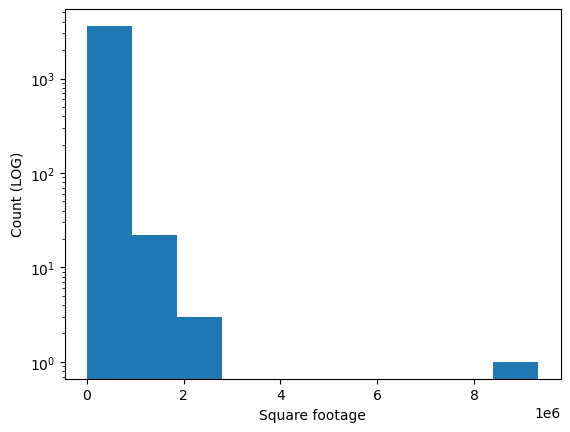

In [65]:
print(stats.describe(df_2020['PropertyGFABuilding(s)']))
plt.hist(df_2020['PropertyGFABuilding(s)'], log=True)
plt.xlabel("Square footage")
plt.ylabel("Count (LOG)")

In [57]:
print(stats.describe(df_2020['PropertyGFABuilding(s)'], nan_policy='omit'))

DescribeResult(nobs=3628, minmax=(9660, 9320156), mean=90679.49917309813, variance=44388721904.55941, skewness=25.254185486928844, kurtosis=1026.5150828045673)


DescribeResult(nobs=3593, minmax=(masked_array(data=0.,
             mask=False,
       fill_value=1e+20), masked_array(data=43.7,
             mask=False,
       fill_value=1e+20)), mean=1.0813247982187586, variance=3.1812407833965692, skewness=masked_array(data=7.7169135,
             mask=False,
       fill_value=1e+20), kurtosis=121.94401987069187)


Text(0, 0.5, 'Count (LOG)')

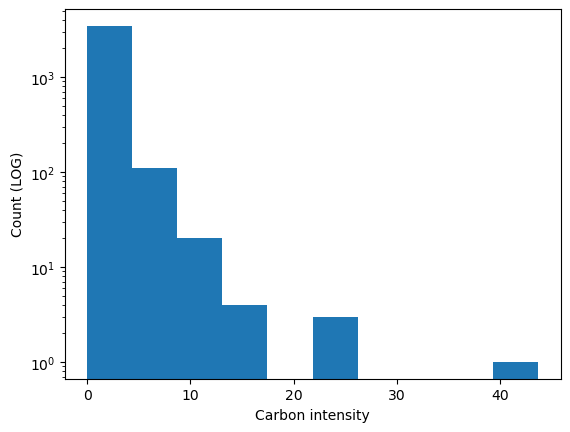

In [66]:
print(stats.describe(df_2020['GHGEmissionsIntensity'], nan_policy='omit'))
plt.hist(df_2020['GHGEmissionsIntensity'], log=True)
plt.xlabel("Carbon intensity")
plt.ylabel("Count (LOG)")

Small buildings stats: 
 count    39.000000
mean      0.658974
std       0.872298
min       0.000000
25%       0.200000
50%       0.200000
75%       0.900000
max       4.000000
Name: GHGEmissionsIntensity, dtype: float64
Large buildings stats: 
 count    3554.000000
mean        1.085959
std         1.790543
min         0.000000
25%         0.200000
50%         0.600000
75%         1.300000
max        43.700000
Name: GHGEmissionsIntensity, dtype: float64
KstestResult(statistic=0.2579248558630002, pvalue=0.009429885983610182)


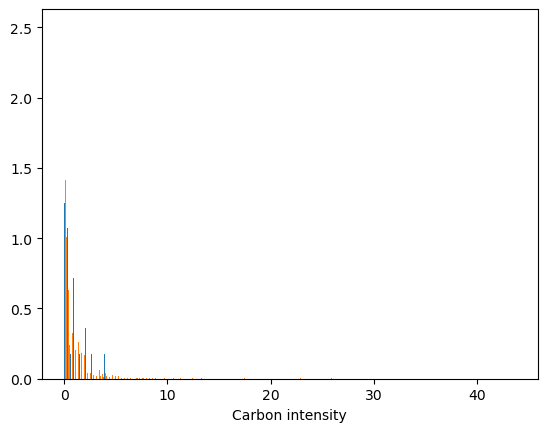

In [82]:
int_large = df_2020[df_2020['PropertyGFABuilding(s)'] >= 20000]['GHGEmissionsIntensity']
int_small = df_2020[df_2020['PropertyGFABuilding(s)'] < 20000]['GHGEmissionsIntensity']

print("Small buildings stats: \n", int_small.describe())
print("Large buildings stats: \n", int_large.describe())

plt.hist([int_small, int_large], density=True, bins='fd')
plt.xlabel("Carbon intensity")

# H0: small and large building carbon intensity follow the same distribution. 
# If p < 0.05 then can reject the null. 
# pvalue=0.0094 < 0.05 so reject null that small and large bulidings have same distribution. 
# Note to self: KS test when unbinned data, chi-squared when binned. 
print(stats.ks_2samp(int_small, int_large))

# Building Type Data
- What does intensity look like for each building type? 
- Hospitals the worst- most in district 3
- College/university also bad and they ALSO have labs, data centers
- Sum total emissions, square footage by each building type
- Currently in mayor's proposal vs. what we want
- Stretch goal: cute visualization for people in legislation
- total ghg per building type and also as a fraction of city-wide emissions

In [95]:
df_2020.groupby(df_2020['LargestPropertyUseType'])['GHGEmissionsIntensity'].mean().sort_values()

LargestPropertyUseType
Bank Branch                              0.050000
Convenience Store without Gas Station    0.100000
Energy/Power Station                     0.200000
Food Service                             0.200000
Movie Theater                            0.300000
                                           ...   
Supermarket/Grocery Store                4.521951
College/University                       4.546154
Data Center                              5.933333
Laboratory                               6.840000
Hospital (General Medical & Surgical)    7.450000
Name: GHGEmissionsIntensity, Length: 63, dtype: float64

In [99]:
df_2020[df_2020['LargestPropertyUseType']=="Hospital (General Medical & Surgical)"]['CouncilDistrictCode']

0    3.0
Name: CouncilDistrictCode, dtype: float64